<h1>Analysis of Word Cloud</h1>

In [190]:
import requests
from bs4 import BeautifulSoup as soup
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [191]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [192]:
from datetime import date

today = date.today()

d = today.strftime("%m-%d-%y")

print(today)
print(d)

2023-10-20
10-20-23


In [219]:
# target = 'war'
url = "https://edition.cnn.com/2023/10/18/middleeast/arab-allies-snub-biden-gaza-mime-intl/index.html".format(d)

url

'https://edition.cnn.com/2023/10/18/middleeast/arab-allies-snub-biden-gaza-mime-intl/index.html'

In [220]:
request = requests.get(url)

In [221]:
# request.text

In [225]:
x= soup(request.content, 'html.parser')

In [247]:
# for target in x.findAll("h1"):
    # print('line: {}'.format(target.text.strip()))

In [246]:
# for news in x.findAll('article',{'class':'article'}):
    # print('line:{}'.format(news.text.strip()))

In [ ]:
sentiments = []

for i in range(0, len(news_html)):
    sentiments.append(
            {
                'ticker': ticker,
                'date': news_html[i].find('h5', {'class': 'article__date'}).text, #h5
                'title': news_html[i].find('h4', {'class': 'article__title-text'}).text, #h4
                'text': news_html[i].find('p', {'class': 'article__text'}).text  # p
            }
        )

In [330]:
nbc_url='https://www.nbcnews.com/news/world/live-blog/israel-hamas-war-live-updates-aid-trucks-wait-cross-gaza-another-night-rcna121348'

r = requests.get('https://www.nbcnews.com/news/world/live-blog/israel-hamas-war-live-updates-aid-trucks-wait-cross-gaza-another-night-rcna121348')

b = soup(r.content,'html')

headlines = []

for news in b.findAll('h2'):
    headlines.append(
    {
    'Date':format(d),
    'headlines' :news.text.strip()
        
    })
    
    # print('Headlines: {}'.format(news.text.strip()))

In [331]:
headlines

[{'Date': '10-20-23', 'headlines': 'What we know'},
 {'Date': '10-20-23',
  'headlines': 'More than words: Anti-Israel protests get physical across Middle East'},
 {'Date': '10-20-23',
  'headlines': 'Biden: Hamas attacked in part to derail potential Saudi-Israel agreement'},
 {'Date': '10-20-23',
  'headlines': "Father of freed U.S. hostage says she sounded 'very good' during phone call"},
 {'Date': '10-20-23',
  'headlines': "'We cannot close for one month,' Ashdod restaurant owner says"},
 {'Date': '10-20-23', 'headlines': 'Death toll for journalists increases'},
 {'Date': '10-20-23',
  'headlines': 'Video shot by Hamas shows release of two American hostages'},
 {'Date': '10-20-23',
  'headlines': 'Former U.S. Rep. Justin Amash says relatives killed in church blast'},
 {'Date': '10-20-23',
  'headlines': 'Biden vowed U.S. support in call with freed hostages'},
 {'Date': '10-20-23',
  'headlines': 'What do we know about released American hostages Judith and Natalie Raanan?'},
 {'Date

In [341]:
df = pd.DataFrame(headlines)
# df = df.set_index('Date')

df.head()

,Date,headlines
0,10-20-23,What we know
1,10-20-23,More than words: Anti-Israel protests get phys...
2,10-20-23,Biden: Hamas attacked in part to derail potent...
3,10-20-23,Father of freed U.S. hostage says she sounded ...
4,10-20-23,"'We cannot close for one month,' Ashdod restau..."


In [342]:
df.headlines

0                                          What we know
1     More than words: Anti-Israel protests get phys...
2     Biden: Hamas attacked in part to derail potent...
3     Father of freed U.S. hostage says she sounded ...
4     'We cannot close for one month,' Ashdod restau...
                            ...                        
60           IDF says more than 100 targets hit in Gaza
61    Former NBC foreign correspondent says members ...
62    American woman who survived festival attack pl...
63    How Arab leaders could receive Biden’s support...
64    Antisemitic and anti-Muslim hate crimes on the...
Name: headlines, Length: 65, dtype: object

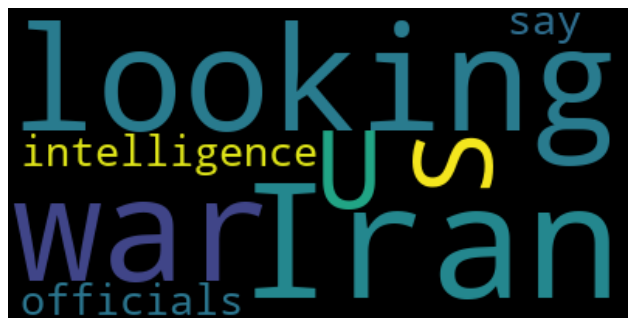

In [345]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6), dpi=80)

text = df.headlines[10]

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [321]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/horus/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [323]:
analyser = SentimentIntensityAnalyzer()

print(df['headlines'][4])
print(analyser.polarity_scores(df['headlines'][4]))

'We cannot close for one month,' Ashdod restaurant owner says
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


<ipython-input-323-434542f1d71c>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df['headlines'][4])
<ipython-input-323-434542f1d71c>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(analyser.polarity_scores(df['headlines'][4]))


In [324]:
def calc_sentiment_score(text):
    return analyser.polarity_scores(text)["compound"]

analyser = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['headlines'].apply(calc_sentiment_score)

In [325]:
df

,headlines,sentiment_score
Date,,
10-20-23,What we know,0.0000
10-20-23,More than words: Anti-Israel protests get phys...,-0.2263
10-20-23,Biden: Hamas attacked in part to derail potent...,-0.2500
10-20-23,Father of freed U.S. hostage says she sounded ...,0.7089
10-20-23,"'We cannot close for one month,' Ashdod restau...",0.0000
...,...,...
10-20-23,IDF says more than 100 targets hit in Gaza,0.0000
10-20-23,Former NBC foreign correspondent says members ...,0.0000
10-20-23,American woman who survived festival attack pl...,0.7269


<Axes: xlabel='Date'>

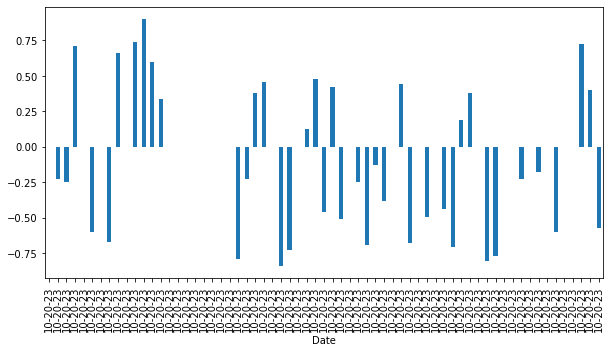

In [326]:
df['sentiment_score'].plot(kind='bar', figsize=(10,5))

In [292]:
# news = []

# for i in range(0, len(news)):
#     sentiments.append()

In [228]:
# print(soup.prettify())

In [95]:
# soup.find_all()

In [ ]:
wc = WordCloud(max_font_size=50, 
               max_words=100, 
               background_color="white").generate(phrase)

In [ ]:
wc

In [ ]:
plt.figure()
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()